In [19]:
# 中文不兼容时运行
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ------------------- ① 统一字体 -------------------
# 常见中文字体列表（按系统顺序尝试）
CHINESE_FONTS = [
    "SimHei",               # Windows（黑体）
    "Microsoft YaHei",      # Windows（微软雅黑）
    "Arial Unicode MS",     # macOS/Windows
    "PingFang SC",          # macOS（苹方）
    "Noto Sans CJK SC",     # Linux（Google Noto）
    "WenQuanYi Zen Hei",    # Linux（文泉）
]

def set_chinese_font():
    """遍历常见中文字体，只要系统中存在就设为默认字体。"""
    for f in CHINESE_FONTS:
        try:
            plt.rcParams["font.sans-serif"] = [f]   # 设置无衬线字体
            plt.rcParams["axes.unicode_minus"] = False  # 负号正常显示
            # 测试是否真的可用
            plt.figure()
            plt.text(0.5, 0.5, "测试字体", fontsize=12)
            plt.close()
            print(f"已使用字体：{f}")
            break
        except Exception:
            continue
    else:
        print("⚠️ 未找到系统中文字体，仍可能出现方框。")

set_chinese_font()

已使用字体：SimHei


# 线性回归  

P: 衡量某自变量对因变量是否有显著影响 (越小越显著)  
$R^2$ : 衡量线性回归模型整体的预测拟合度

In [20]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

sns.set_palette('pastel')

In [2]:
# 假设脚本位于 F:\学习路线&笔记\学习笔记\Python&数据分析\main.py
# 那么可以直接写相对路径：
df = pd.read_csv('./课件/07数据分析篇/house_price_simple.csv')

In [3]:
df

,面积,卧室数,厕所数,所在城市,价格
0,957.2,2,1,C,397300
1,1998.7,3,1,B,719500
2,1641.5,4,3,B,628300
3,746.9,2,2,D,359300
4,1210.7,3,1,D,487500
...,...,...,...,...,...
995,1817.4,4,2,C,680100
996,2035.0,2,2,A,705000
997,1045.3,3,3,B,454400
998,1735.1,2,3,A,629300


## 多分类变量处理

ps: 单分类变量 <=> 0/1

In [4]:
# 把分类变量转换成二进制的哑变量（独热编码）
clean_df = pd.get_dummies(df, 
                          columns=["所在城市"],
                          dtype=int, 
                          drop_first=True)
clean_df

,面积,卧室数,厕所数,价格,所在城市_B,所在城市_C,所在城市_D
0,957.2,2,1,397300,0,1,0
1,1998.7,3,1,719500,1,0,0
2,1641.5,4,3,628300,1,0,0
3,746.9,2,2,359300,0,0,1
4,1210.7,3,1,487500,0,0,1
...,...,...,...,...,...,...,...
995,1817.4,4,2,680100,0,1,0
996,2035.0,2,2,705000,0,0,0
997,1045.3,3,3,454400,1,0,0
998,1735.1,2,3,629300,0,0,0


In [6]:
y = clean_df['价格']
X = clean_df.drop('价格', axis=1)

## 检查自变量之间的相关性  
- 越接近0 越不相关
- 当 |corr| > significant level : 有严重共线性, 应舍弃一个

### |corr| > significant level (一般0.8)： 有严重共线性, 应舍弃一个

In [11]:
X['面积'].corr(X['卧室数']) 


corr_df = X.corr().abs()
corr_df[corr_df > 0.8].sum()

面积        1.0
卧室数       1.0
厕所数       1.0
所在城市_B    1.0
所在城市_C    1.0
所在城市_D    1.0
dtype: float64

### 共线性热力图  
越接近1越相关

<Axes: >

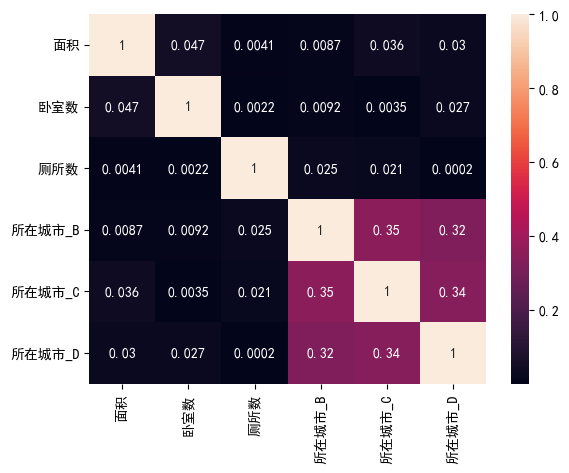

In [21]:
# headmap 展示相关性
sns.heatmap(X.corr().abs(), annot=True)

In [22]:
# 添加一列值为1 的 const 来计算截距
X = sm.add_constant(X)

In [23]:
X

,const,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
0,1.0,957.2,2,1,0,1,0
1,1.0,1998.7,3,1,1,0,0
2,1.0,1641.5,4,3,1,0,0
3,1.0,746.9,2,2,0,0,1
4,1.0,1210.7,3,1,0,0,1
...,...,...,...,...,...,...,...
995,1.0,1817.4,4,2,0,1,0
996,1.0,2035.0,2,2,0,0,0
997,1.0,1045.3,3,3,1,0,0
998,1.0,1735.1,2,3,0,0,0


In [ ]:
# 以X,y 建立回归模型
model = sm.OLS(y, X) # Ordinay Learst Square: 最新二乘
# 进行数据拟合
result = model.fit()

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     价格   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.766e+04
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:05:41   Log-Likelihood:                -10262.
No. Observations:                1000   AIC:                         2.054e+04
Df Residuals:                     993   BIC:                         2.057e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.824e+04   1383.024     49.341      0.000    6.55e+04     7.1e+04
面积           299.7279      0.440    680.850      0.000     298.864     300.592
卧室数         8365.4726    270.523     30.923      0.000    7834.610    8896.335
厕所数         1.131e+04    394.998     28.640      0.000    1.05e+04    1.21e+04
所在城市_B      4250.1208    625.407      6.796      0.000    3022.850    5477.391
所在城市_C      9213.1877    615.594     14.966      0.000    8005.173    1.04e+04
所在城市_D      1.506e+04    633.226     23.779      0.000    1.38e+04    1.63e+04
==============================================================================
Omnibus:                        4.096   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.538
Skew:                          -0.066   Prob(JB):                        0.170
Kurtosis:                       2.740   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 拟合后评估
- **P>|t| 这一列 > significance level : 说明该行数据不是预测的关键因素;**  
当 > significance level, 可以剔除,
  - **剔除后再拟合模型**
- R-squared: 越接近1, 说明model的拟合效果越好

## 预测

In [30]:
# setup
l_area = pd.Series([957.2])
l_numbr =  pd.Series([2])
l_numwr =  pd.Series([2])
l_city =  pd.Series(['C'])

df = pd.DataFrame({'面积':l_area, '卧室数':l_numbr, '厕所数':l_numwr, '所在城市':l_city })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   面积      1 non-null      float64 
 1   卧室数     1 non-null      int64   
 2   厕所数     1 non-null      int64   
 3   所在城市    1 non-null      category
dtypes: category(1), float64(1), int64(2)
memory usage: 357.0 bytes


所在城市转换为类别

In [31]:
df['所在城市'] = pd.Categorical(
    df['所在城市'],
    categories=['A', 'B', 'C', 'D']
)

df = pd.get_dummies(df, columns=['所在城市']) # 转换
df

,面积,卧室数,厕所数,所在城市_A,所在城市_B,所在城市_C,所在城市_D
0,957.2,2,2,0,0,1,0


In [33]:
# 预测
result.predict(df)

0    6.534631e+07
dtype: float64